## Imports

In [1]:
import pandas as pd
import numpy as np

import pickle

%pylab inline
%config InlineBackend.figure_formats = ['retina']

import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import featuretools as ft
#import utils

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('traf_init.pickle','rb') as read_file:
    traf_init = pickle.load(read_file)

In [3]:
traf_init.head()

,report_id,timestamp,Obs_Speed,Nom_Speed,Av_Obs_Time,Med_Obs_Time,Nom_Time,Vehicles,Con_Speed,Con_AvTime,Con_MedTime,road_type,Distance
0,158324,2014-03-07T03:45:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030
1,158324,2014-03-07T03:50:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030
2,158324,2014-03-07T03:55:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030
3,158324,2014-03-07T04:00:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030
4,158324,2014-03-07T04:05:00,66,71,56,56,52,2,0.929577,1.076923,1.076923,MAJOR_ROAD,1030


## Creating the Target Variable

In [4]:
traf_init['Is_Congested'] = ((np.where(traf_init['Con_Speed'] < 0.85, 1, 0)) 
                                & (np.where(traf_init['Con_AvTime'] > 1.15, 1, 0)) 
                                & (np.where(traf_init['Con_MedTime'] > 1.15, 1, 0)))

In [5]:
traf_init.head()

,report_id,timestamp,Obs_Speed,Nom_Speed,Av_Obs_Time,Med_Obs_Time,Nom_Time,Vehicles,Con_Speed,Con_AvTime,Con_MedTime,road_type,Distance,Is_Congested
0,158324,2014-03-07T03:45:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1
1,158324,2014-03-07T03:50:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1
2,158324,2014-03-07T03:55:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0
3,158324,2014-03-07T04:00:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0
4,158324,2014-03-07T04:05:00,66,71,56,56,52,2,0.929577,1.076923,1.076923,MAJOR_ROAD,1030,0


## Cleaning up Features

In [6]:
traf_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25097541 entries, 0 to 25097540
Data columns (total 14 columns):
report_id       int64
timestamp       object
Obs_Speed       int64
Nom_Speed       int64
Av_Obs_Time     int64
Med_Obs_Time    int64
Nom_Time        int64
Vehicles        int64
Con_Speed       float64
Con_AvTime      float64
Con_MedTime     float64
road_type       object
Distance        int64
Is_Congested    int64
dtypes: float64(3), int64(9), object(2)
memory usage: 2.6+ GB


### Convert timestamp to datetime object

In [7]:
traf_init['timestamp'] = pd.to_datetime(traf_init['timestamp'])

In [8]:
traf_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25097541 entries, 0 to 25097540
Data columns (total 14 columns):
report_id       int64
timestamp       datetime64[ns]
Obs_Speed       int64
Nom_Speed       int64
Av_Obs_Time     int64
Med_Obs_Time    int64
Nom_Time        int64
Vehicles        int64
Con_Speed       float64
Con_AvTime      float64
Con_MedTime     float64
road_type       object
Distance        int64
Is_Congested    int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(1)
memory usage: 2.6+ GB


In [9]:
traf_init.head()

,report_id,timestamp,Obs_Speed,Nom_Speed,Av_Obs_Time,Med_Obs_Time,Nom_Time,Vehicles,Con_Speed,Con_AvTime,Con_MedTime,road_type,Distance,Is_Congested
0,158324,2014-03-07 03:45:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1
1,158324,2014-03-07 03:50:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1
2,158324,2014-03-07 03:55:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0
3,158324,2014-03-07 04:00:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0
4,158324,2014-03-07 04:05:00,66,71,56,56,52,2,0.929577,1.076923,1.076923,MAJOR_ROAD,1030,0


### Get Dummies for Road Type

In [10]:
road_dummy = pd.get_dummies(traf_init['road_type'])

In [11]:
traf_init = traf_init.merge(road_dummy, left_index=True, right_index=True)

In [12]:
traf_init.head(15)

,report_id,timestamp,Obs_Speed,Nom_Speed,Av_Obs_Time,Med_Obs_Time,Nom_Time,Vehicles,Con_Speed,Con_AvTime,Con_MedTime,road_type,Distance,Is_Congested,MAJOR_ROAD,ROAD,STREET
0,158324,2014-03-07 03:45:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1,1,0,0
1,158324,2014-03-07 03:50:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1,1,0,0
2,158324,2014-03-07 03:55:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0,1,0,0
3,158324,2014-03-07 04:00:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0,1,0,0
4,158324,2014-03-07 04:05:00,66,71,56,56,52,2,0.929577,1.076923,1.076923,MAJOR_ROAD,1030,0,1,0,0
5,158324,2014-03-07 04:10:00,68,71,54,54,52,3,0.957746,1.038462,1.038462,MAJOR_ROAD,1030,0,1,0,0
6,158324,2014-03-07 04:15:00,62,71,59,59,52,1,0.873239,1.134615,1.134615,MAJOR_ROAD,1030,0,1,0,0
7,158324,2014-03-07 04:20:00,62,71,59,59,52,1,0.873239,1.134615,1.134615,MAJOR_ROAD,1030,0,1,0,0
8,158324,2014-03-07 04:25:00,62,71,59,59,52,0,0.873239,1.134615,1.134615,MAJOR_ROAD,1030,0,1,0,0
9,158324,2014-03-07 04:30:00,48,71,77,77,52,2,0.676056,1.480769,1.480769,MAJOR_ROAD,1030,1,1,0,0


### Rename ReportID to Location, since that's what it is

In [13]:
traf_init = traf_init.rename(columns = {"report_id" : "Location"})

In [14]:
traf_init.head()

,Location,timestamp,Obs_Speed,Nom_Speed,Av_Obs_Time,Med_Obs_Time,Nom_Time,Vehicles,Con_Speed,Con_AvTime,Con_MedTime,road_type,Distance,Is_Congested,MAJOR_ROAD,ROAD,STREET
0,158324,2014-03-07 03:45:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1,1,0,0
1,158324,2014-03-07 03:50:00,60,71,61,61,52,0,0.845070,1.173077,1.173077,MAJOR_ROAD,1030,1,1,0,0
2,158324,2014-03-07 03:55:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0,1,0,0
3,158324,2014-03-07 04:00:00,74,71,50,50,52,1,1.042254,0.961538,0.961538,MAJOR_ROAD,1030,0,1,0,0
4,158324,2014-03-07 04:05:00,66,71,56,56,52,2,0.929577,1.076923,1.076923,MAJOR_ROAD,1030,0,1,0,0


## Get a Sample to Speed up Initial Processing

In [15]:
traf_sample = traf_init.sample(n = 7000, random_state = 13 )

### Check if class distribution between sample and data is similar

In [16]:
target_pcts_init = traf_init['Is_Congested'].value_counts(normalize = True)
print(target_pcts_init)

0    0.69752
1    0.30248
Name: Is_Congested, dtype: float64


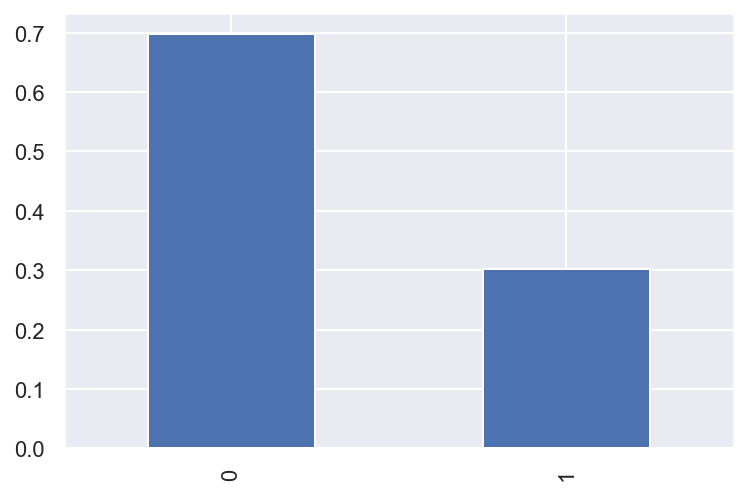

In [17]:
target_pcts_init.plot(kind='bar')

In [18]:
target_pcts_samp = traf_sample['Is_Congested'].value_counts(normalize = True)
print(target_pcts_samp)

0    0.694571
1    0.305429
Name: Is_Congested, dtype: float64


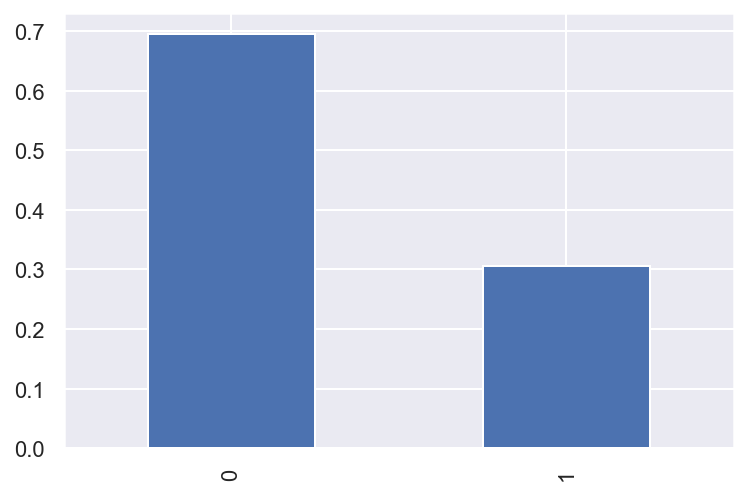

In [19]:
target_pcts_samp.plot(kind='bar')

## Pickle the Data for the Next Step

In [20]:
# Create new df with rearranged columns
traf_sample.columns

Index(['Location', 'timestamp', 'Obs_Speed', 'Nom_Speed', 'Av_Obs_Time',
       'Med_Obs_Time', 'Nom_Time', 'Vehicles', 'Con_Speed', 'Con_AvTime',
       'Con_MedTime', 'road_type', 'Distance', 'Is_Congested', 'MAJOR_ROAD',
       'ROAD', 'STREET'],
      dtype='object')

In [21]:
traf_sample_red = traf_sample[['Location', 'timestamp', 'Obs_Speed', 
                               'Nom_Speed', 'Av_Obs_Time','Med_Obs_Time', 
                               'Nom_Time', 'Vehicles', 'Distance', 
                               'MAJOR_ROAD','ROAD', 'STREET', 
                               'Is_Congested']]

In [22]:
traf_sample_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 19903370 to 13915009
Data columns (total 13 columns):
Location        7000 non-null int64
timestamp       7000 non-null datetime64[ns]
Obs_Speed       7000 non-null int64
Nom_Speed       7000 non-null int64
Av_Obs_Time     7000 non-null int64
Med_Obs_Time    7000 non-null int64
Nom_Time        7000 non-null int64
Vehicles        7000 non-null int64
Distance        7000 non-null int64
MAJOR_ROAD      7000 non-null uint8
ROAD            7000 non-null uint8
STREET          7000 non-null uint8
Is_Congested    7000 non-null int64
dtypes: datetime64[ns](1), int64(9), uint8(3)
memory usage: 622.1 KB


In [23]:
traf_sample_red.head(15)

,Location,timestamp,Obs_Speed,Nom_Speed,Av_Obs_Time,Med_Obs_Time,Nom_Time,Vehicles,Distance,MAJOR_ROAD,ROAD,STREET,Is_Congested
19903370,204007,2014-09-07 04:25:00,43,33,66,66,86,0,798,1,0,0,0
13837934,158805,2014-09-13 02:55:00,77,61,43,43,54,0,920,1,0,0,0
13691008,158536,2014-08-24 16:15:00,94,109,124,124,108,6,3255,1,0,0,0
24037406,198113,2014-10-08 22:55:00,53,36,100,100,148,0,1489,1,0,0,0
23553783,195446,2014-10-29 13:30:00,18,35,188,188,101,2,978,1,0,0,1
19725073,203716,2014-08-23 00:35:00,0,29,0,0,165,0,1326,1,0,0,0
23005882,192520,2014-10-23 02:35:00,60,42,134,134,193,0,2248,1,0,0,0
1904665,180547,2014-05-04 05:20:00,39,49,94,94,75,0,1020,1,0,0,1
18331675,195658,2014-09-18 10:50:00,29,20,78,78,117,8,646,1,0,0,0
11122683,201669,2014-02-23 09:25:00,61,64,173,173,167,0,2953,1,0,0,0


In [24]:
with open('traf_2.pickle', 'wb') as to_write:
    pickle.dump(traf_init, to_write)

In [25]:
with open('traf_sample.pickle', 'wb') as to_write:
    pickle.dump(traf_sample, to_write)

In [26]:
with open('traf_sample_red.pickle', 'wb') as to_write:
    pickle.dump(traf_sample_red, to_write)

## EDA and Baselining

In [ ]:
target_pcts = traf_init['Is_Congested'].value_counts(normalize = True)
print(target_pcts)

In [ ]:
target_pcts.plot(kind='bar')

In [ ]:
traf_init.groupby('Is_Congested').mean()

In [ ]:
def plot_features(df, sample_size=500):
    sample = (df[['Is_Congested', 'Obs_Speed']]
                .sample(1000, random_state=13)) 
    sns.pairplot(sample,hue='Is_Congested', plot_kws=dict(alpha=.3, edgecolor='none'))


In [ ]:
plot_features(traf_init)

In [ ]:
# histogram of Observed Speed
traf_init['Obs_Speed'].hist()
plt.title('Histogram of Observed Speed')
plt.xlabel('Observed Speed')
plt.ylabel('Frequency')

In [ ]:
# histogram of Vehicles
sns.distplot(traf_init['Vehicles'])
# traf_init['Vehicles'].hist()
plt.title('Histogram of # of Vehicles')
plt.xlabel('# of Vehicles')
plt.ylabel('Frequency')

In [ ]:
# histogram of Vehicles
# sns.distplot(traf_init['Vehicles'])
traf_init['Vehicles'].hist()
plt.title('Histogram of # of Vehicles')
plt.xlabel('# of Vehicles')
plt.ylabel('Frequency')

## Splitting into Training and Testing Sets

In [ ]:
y = traf_full['Is_Congested']

In [ ]:
y.head(15)

In [ ]:
X = traf_full[['report_id', 'timestamp', 'Obs_Speed', 'Nom_Speed', 'Av_Obs_Time',
       'Med_Obs_Time', 'Nom_Time', 'Vehicles',
       'road_type', 'Distance']]

In [ ]:
X.head(15)

In [ ]:
# Get the train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Running Basic Logistic Regression

In [ ]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
f1_score(lr.predict(X_test), y_test)

In [ ]:
import pandas as pd
import numpy as np

import pickle

In [ ]:
with open('traf_sample.pickle','rb') as read_file:
    traf_sample = pickle.load(read_file)

In [ ]:
traf_sample.head()

In [ ]:
traf_sample['Is_Congested'] = ((np.where(traf_sample['Con_Speed'] < 0.75, 1, 0)) 
                                & (np.where(traf_sample['Con_AvTime'] > 1.25, 1, 0)) 
                                & (np.where(traf_sample['Con_MedTime'] > 1.25, 1, 0)))

In [ ]:
# traf_sample['Is_Congested'] = ((traf_sample['Con_Speed'] < 0.75) 
#                                 & (traf_sample['Con_AvTime'] > 1.25) 
#                                 & (traf_sample['Con_MedTime'] > 1.25))

In [ ]:
traf_sample.head(15)

In [ ]:
traf_sample['Is_Congested'].value_counts()